## Data Exploration & Cleaning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spotify_history.csv")
df.head(5)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [4]:
# convert dtype of 'ts' from object to datetime

df['ts'] = pd.to_datetime(df['ts'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   spotify_track_uri  149860 non-null  object        
 1   ts                 149860 non-null  datetime64[ns]
 2   platform           149860 non-null  object        
 3   ms_played          149860 non-null  int64         
 4   track_name         149860 non-null  object        
 5   artist_name        149860 non-null  object        
 6   album_name         149860 non-null  object        
 7   reason_start       149717 non-null  object        
 8   reason_end         149743 non-null  object        
 9   shuffle            149860 non-null  bool          
 10  skipped            149860 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(1), object(7)
memory usage: 10.6+ MB


In [6]:
df['hour'] = df['ts'].dt.hour
df['day_name'] = df['ts'].dt.day_name() 
df['month'] = df['ts'].dt.month_name() 
df['date'] = df['ts'].dt.date

In [7]:
df['minutes_played'] = df['ms_played']/60000

def define_skip (row) :
    if row['skipped'] == True : 
        return 1 
    elif row['minutes_played'] < .5 :    # less than 30 second
        return 1 
    else : 
        return 0 


df['is_skipped'] = df.apply(define_skip,axis=1)

df_clean = df[(df['minutes_played'] > 0) & (df['minutes_played'] < 15)].copy()

print("Clean Data Shape:", df_clean.shape)

Clean Data Shape: (146107, 17)


In [8]:
print(df_clean['is_skipped'].value_counts(normalize=True))
print('-' * 50)
print(df_clean['artist_name'].value_counts().head(5))

is_skipped
0    0.632105
1    0.367895
Name: proportion, dtype: float64
--------------------------------------------------
artist_name
The Beatles       13305
The Killers        6689
John Mayer         4740
Bob Dylan          3720
Paul McCartney     2658
Name: count, dtype: int64


In [18]:
print('Nulls in Start column:',df['reason_start'].isna().sum())
print('Nulls in end column:',df['reason_end'].isna().sum())

df['reason_start'] = df['reason_start'].fillna('unknown')
df['reason_end'] = df['reason_end'].fillna('unknown')

print('*' * 50)
df.info()

Nulls in Start column: 0
Nulls in end column: 117
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   spotify_track_uri  149860 non-null  object        
 1   ts                 149860 non-null  datetime64[ns]
 2   platform           149860 non-null  object        
 3   ms_played          149860 non-null  int64         
 4   track_name         149860 non-null  object        
 5   artist_name        149860 non-null  object        
 6   album_name         149860 non-null  object        
 7   reason_start       149860 non-null  object        
 8   reason_end         149860 non-null  object        
 9   shuffle            149860 non-null  bool          
 10  skipped            149860 non-null  bool          
 11  hour               149860 non-null  int32         
 12 

In [19]:
def define_skip_v2(row):
    if row['skipped'] == True:
        return 1
    
    if row['reason_end'] == 'trackdone':
        return 0
        
    if row['reason_end'] in ['fwdbtn', 'backbtn']:
        return 1
    
    if row['minutes_played'] < 0.5:
        return 1
        
    return 0

df['is_skipped'] = df.apply(define_skip_v2, axis=1)

print(df['is_skipped'].value_counts(normalize=True))

is_skipped
0    0.573782
1    0.426218
Name: proportion, dtype: float64


In [20]:
df

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,hour,day_name,month,date,minutes_played,is_skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,clickrow,clickrow,False,False,2,Monday,July,2013-07-08,0.053083,1
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2,Monday,July,2013-07-08,1.031083,0
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,unknown,unknown,False,False,2,Monday,July,2013-07-08,4.756433,0
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,clickrow,False,False,2,Monday,July,2013-07-08,2.233700,0
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,nextbtn,nextbtn,False,False,3,Monday,July,2013-07-08,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True,23,Sunday,December,2024-12-15,0.020783,1
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True,23,Sunday,December,2024-12-15,0.025250,1
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True,23,Sunday,December,2024-12-15,0.021383,1
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True,23,Sunday,December,2024-12-15,0.021767,1


## Exploratory Data Analysis - EDA

In [21]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

Determine whether most listeners are nocturnal or diurnal based on their listening times.

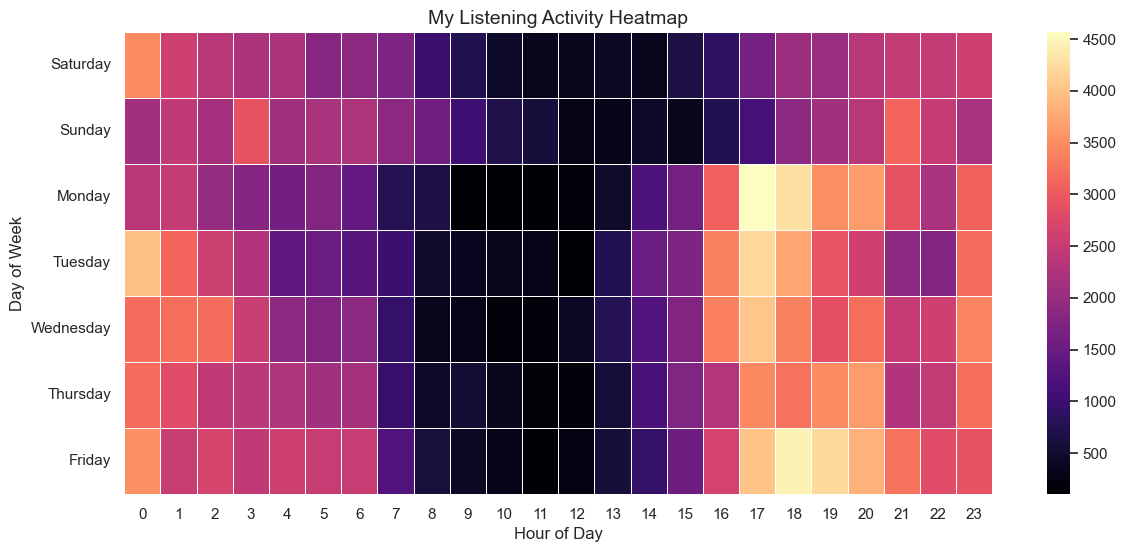

In [22]:
activity_pivot = df.pivot_table(
    index='day_name', 
    columns='hour', 
    values='minutes_played', 
    aggfunc='sum'
).fillna(0)

days_order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
activity_pivot = activity_pivot.reindex(days_order)

plt.figure(figsize=(14, 6))
sns.heatmap(activity_pivot, cmap='magma', linewidths=0.5,annot=False)
plt.title('My Listening Activity Heatmap', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.show()

We want to see which artist you listen to attentively (Low Skip Rate) and which one you skip a lot.

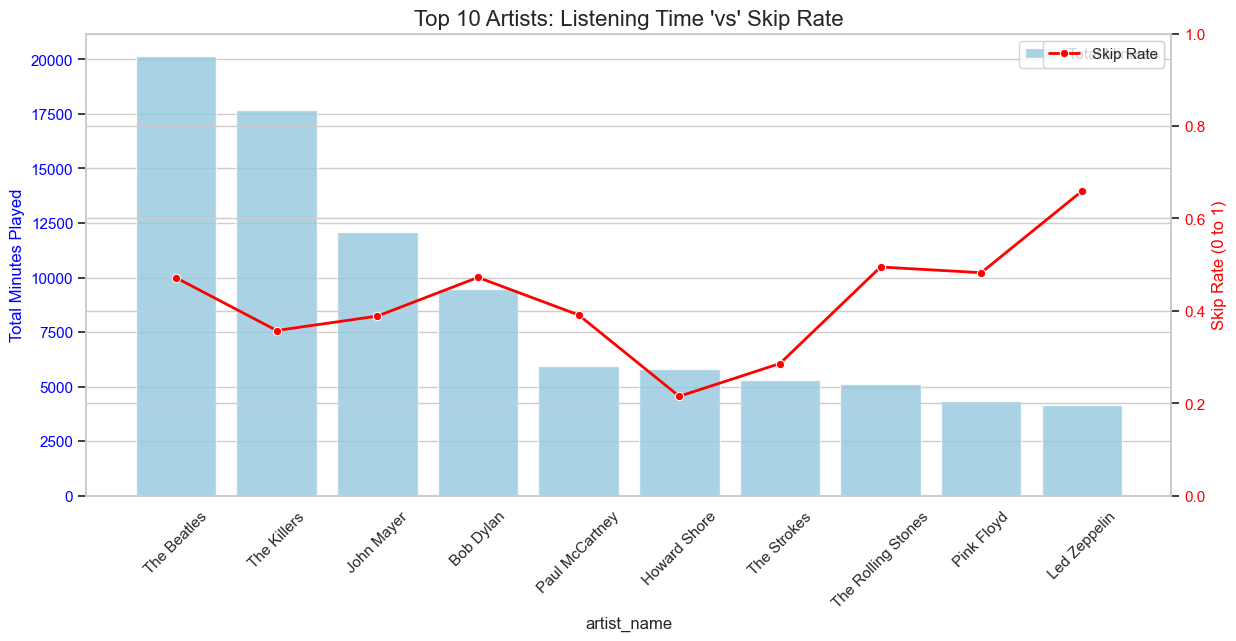

In [23]:
artist_stats = df.groupby('artist_name').agg({
    'minutes_played': 'sum',
    'is_skipped': ['count', 'mean'] 
}).reset_index()

artist_stats.columns = ['artist_name', 'total_minutes', 'total_plays', 'skip_rate']

top_artists = artist_stats[artist_stats['total_plays'] > 50].sort_values('total_minutes', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.barplot(data=top_artists, x='artist_name', y='total_minutes', color='skyblue', ax=ax1, alpha=0.8, label='Total Minutes')
ax1.set_ylabel('Total Minutes Played', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
sns.lineplot(data=top_artists, x='artist_name', y='skip_rate', color='red', marker='o', ax=ax2, linewidth=2, label='Skip Rate')
ax2.set_ylabel('Skip Rate (0 to 1)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 1) 

plt.title("Top 10 Artists: Listening Time 'vs' Skip Rate", fontsize=16)
plt.show()

Calculating the skip percentage for each operating method

C:\Users\Softlaptop\AppData\Local\Temp\ipykernel_23920\3470212794.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=start_reason_stats, x='reason_start', y='is_skipped', palette='flare')


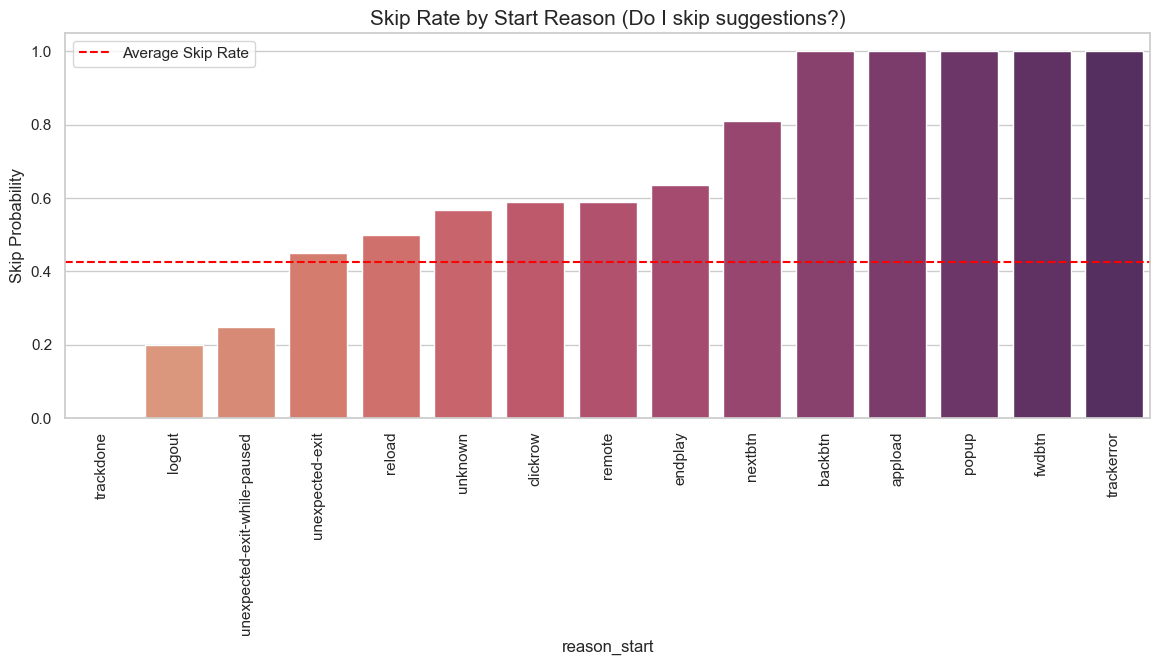

In [24]:
start_reason_stats = df.groupby('reason_start')['is_skipped'].mean().reset_index().sort_values('is_skipped')

plt.figure(figsize=(14, 5))
sns.barplot(data=start_reason_stats, x='reason_start', y='is_skipped', palette='flare')
plt.title('Skip Rate by Start Reason (Do I skip suggestions?)', fontsize=15)
plt.ylabel('Skip Probability', fontsize=12)
plt.xticks(rotation=90)
plt.axhline(df['is_skipped'].mean(), color='red', linestyle='--', label='Average Skip Rate') 
plt.legend()
plt.show()

ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


features = ['reason_start', 'shuffle', 'hour', 'day_name', 'platform', 'artist_name']
target = 'is_skipped'

model_data = df_clean[features + [target]].copy()

le = LabelEncoder()

for col in ['reason_start', 'day_name', 'platform', 'artist_name']:
    model_data[col] = le.fit_transform(model_data[col].astype(str))

model_data['shuffle'] = model_data['shuffle'].astype(int)

X = model_data[features]
y = model_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (116885, 6)
Testing Shape: (29222, 6)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

print("Training the model... (This might take a moment)")
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}") # دقة الموديل
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Training the model... (This might take a moment)
Model Accuracy: 80.32%

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.85      0.84     18494
           1       0.73      0.73      0.73     10728

    accuracy                           0.80     29222
   macro avg       0.79      0.79      0.79     29222
weighted avg       0.80      0.80      0.80     29222



C:\Users\Softlaptop\AppData\Local\Temp\ipykernel_23920\1780891476.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette='viridis')


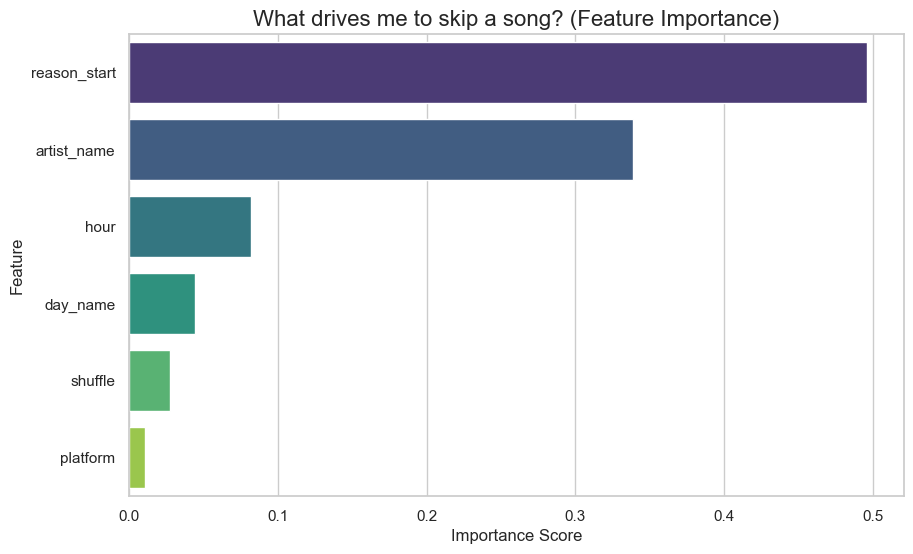

In [ ]:
feature_imp = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='viridis')
plt.title('What drives me to skip a song? (Feature Importance)', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
df_clean.to_excel('My_Spotify_Cleaned_Data.xlsx', index=False)

feature_imp_df = pd.DataFrame({
    'Feature': feature_imp.index,
    'Importance': feature_imp.values
})
feature_imp_df.to_excel('Model_Feature_Importance.xlsx', index=False)

print("Data exported successfully! Ready for Power BI.")

Data exported successfully! Ready for Power BI.
